# PFDA Project - Winter 2024
*****

## Introduction

This notebook contains an analysis of historical windspeed data recorded by Met Éireann at the Johnstown Castle weather station in County Wexford between 12 August 2003 and 01 December 2024<sup>[1]</sup>.

In [130]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.units as munits

In [131]:
# load data
df=pd.read_csv("hly1775.csv", skiprows=17, low_memory=False)

In [132]:
# sanity check
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,12-aug-2003 01:00,-1,,4,,4,,,,,,7,,7,
1,12-aug-2003 02:00,-1,,4,,4,,,,,,7,,7,
2,12-aug-2003 03:00,-1,,4,,4,,,,,,7,,7,
3,12-aug-2003 04:00,-1,,4,,4,,,,,,7,,7,
4,12-aug-2003 05:00,-1,,4,,4,,,,,,7,,7,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186763,30-nov-2024 20:00,0,0.0,0,13.1,0,12.7,12.5,14.5,96,1010.7,2,17,2,190
186764,30-nov-2024 21:00,0,0.0,0,13.2,0,12.7,12.3,14.3,94,1010.3,2,18,2,180
186765,30-nov-2024 22:00,0,0.0,0,13.3,0,12.8,12.3,14.3,93,1010.0,2,18,2,190
186766,30-nov-2024 23:00,0,3.0,0,13.0,0,12.8,12.6,14.6,97,1009.8,2,15,2,190


In [133]:
# split date column into date and time columns
df[['date', 'time']] = df['date'].str.split(' ', n=1, expand=True)
# convert date column to datetime 
df["date"]=df['date'].astype('datetime64[ns]')
# set date column as index column
df.set_index('date', inplace=True)
df

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,time
date,,,,,,,,,,,,,,,
2003-08-12,-1,,4,,4,,,,,,7,,7,,01:00
2003-08-12,-1,,4,,4,,,,,,7,,7,,02:00
2003-08-12,-1,,4,,4,,,,,,7,,7,,03:00
2003-08-12,-1,,4,,4,,,,,,7,,7,,04:00
2003-08-12,-1,,4,,4,,,,,,7,,7,,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,0,0.0,0,13.1,0,12.7,12.5,14.5,96,1010.7,2,17,2,190,20:00
2024-11-30,0,0.0,0,13.2,0,12.7,12.3,14.3,94,1010.3,2,18,2,180,21:00
2024-11-30,0,0.0,0,13.3,0,12.8,12.3,14.3,93,1010.0,2,18,2,190,22:00


In [134]:
# drop missing values from windspeed data
df["wdsp"]= df.loc[:,("wdsp")].replace(' ', np.nan)
df.dropna(inplace=True)
df['wdsp']=df['wdsp'].astype(float)
df["wdsp"]

date
2003-08-13     4.0
2003-08-13     4.0
2003-08-13     4.0
2003-08-13     4.0
2003-08-13     3.0
              ... 
2024-11-30    17.0
2024-11-30    18.0
2024-11-30    18.0
2024-11-30    15.0
2024-12-01    13.0
Name: wdsp, Length: 185772, dtype: float64

In [135]:
# calculate mean figures for each numerical column per day
mean_per_day=df.groupby([df.index]).mean(numeric_only =True)
# sanity check
mean_per_day

,ind,ind.1,ind.2,ind.3,wdsp,ind.4
date,,,,,,
2003-08-13,-0.076923,0.0,0.0,2.0,4.076923,2.0
2003-08-14,0.000000,0.0,0.0,2.0,6.375000,2.0
2003-08-15,0.000000,0.0,0.0,2.0,5.916667,2.0
2003-08-16,0.000000,0.0,0.0,2.0,5.166667,2.0
2003-08-17,0.000000,0.0,0.0,2.0,6.250000,2.0
...,...,...,...,...,...,...
2024-11-27,0.000000,0.0,0.0,2.0,6.458333,2.0
2024-11-28,0.000000,0.0,0.0,2.0,11.708333,2.0
2024-11-29,0.000000,0.0,0.0,2.0,15.708333,2.0


UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

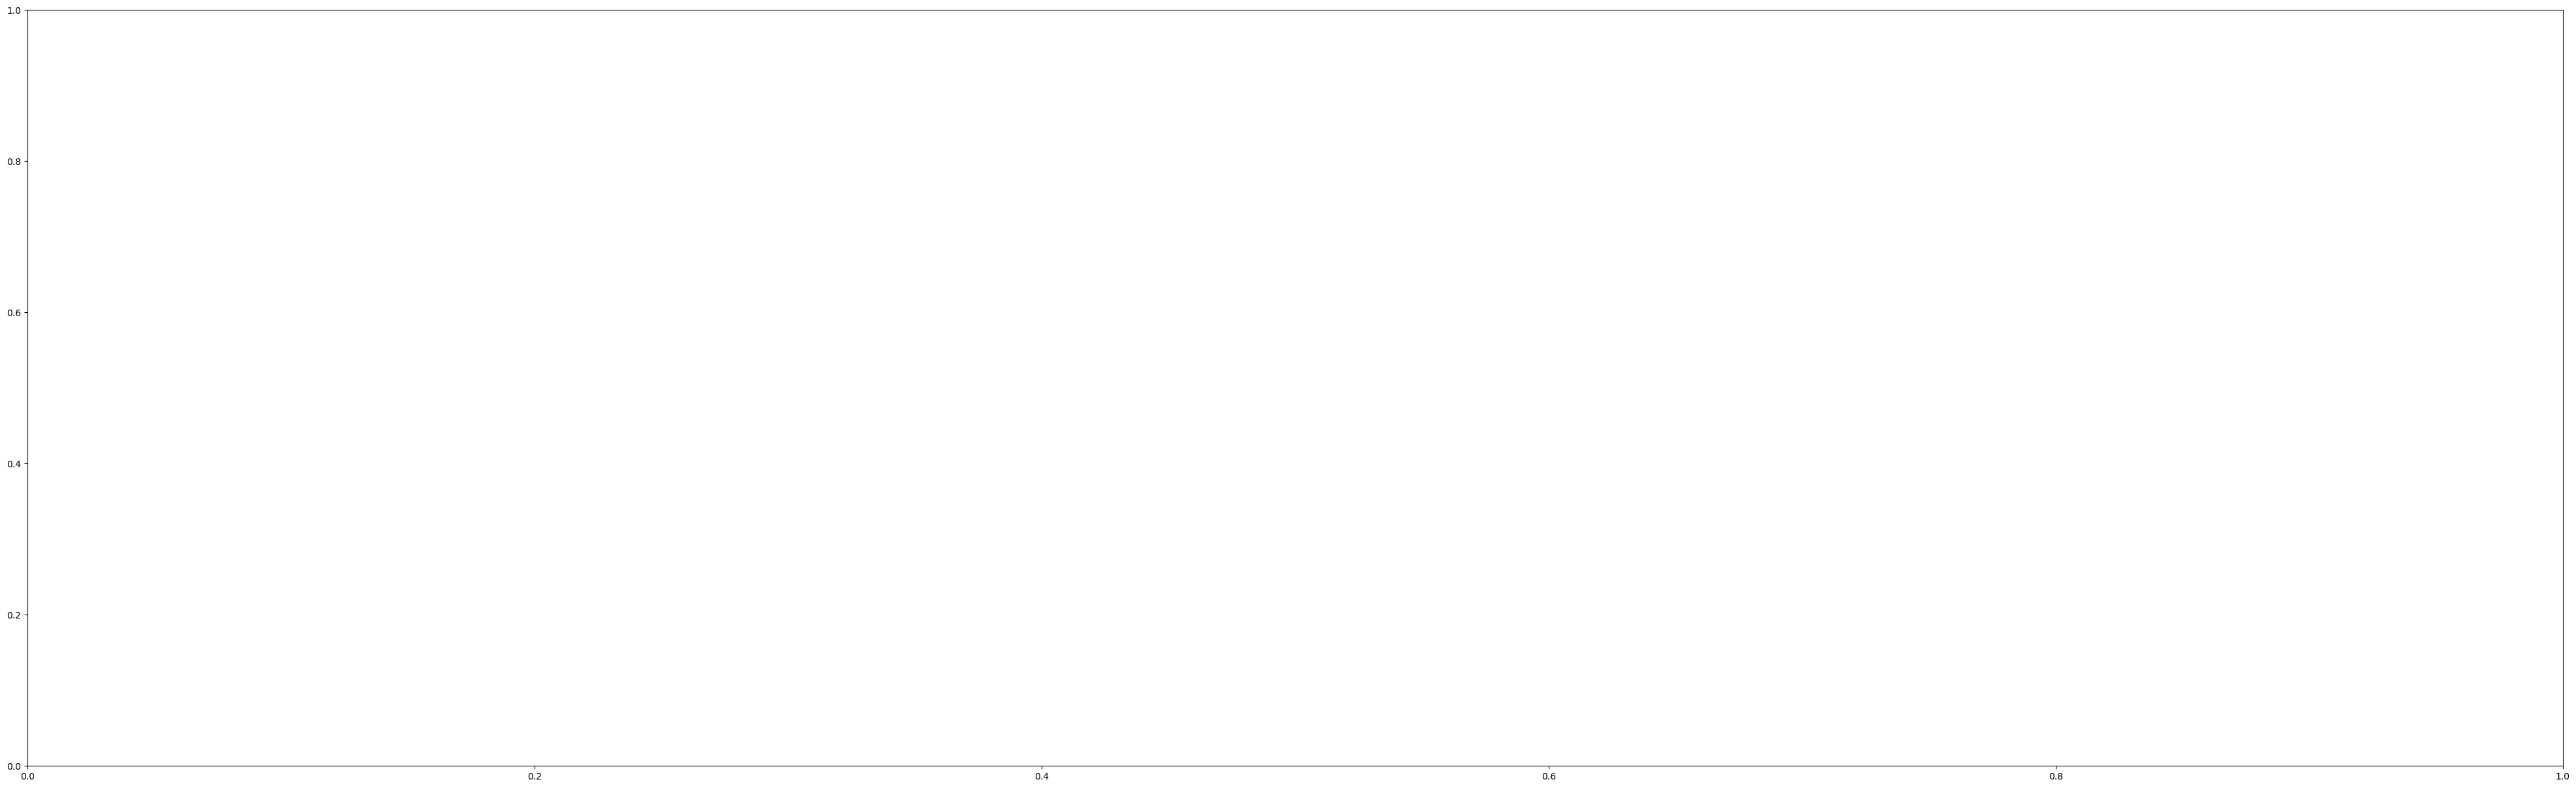

In [ ]:
# plot windspeed vs date
fig, ax = plt.subplots(figsize=(50,15))

#mean_per_day['wdsp']=mean_per_day['wdsp'].astype(int)
wdsp=mean_per_day["wdsp"]
#mean_per_day.index=mean_per_day.index.astype(float)
#date=mean_per_day.index
wdsp=wdsp.to_numpy()
mean_per_day.index=mean_per_day.index.to_pydatetime() # reference no.4
#date=date.to_numpy

# define m and c for trendline 
m, c = np.polyfit(mean_per_day.index, wdsp, 2)

# label axes
ax.set_xlabel("Date")
ax.set_ylabel("Windspeed (knot)")
# add title
ax.set_title("Windspeed over time")

ax.plot(mean_per_day.index, wdsp, "*")
# plot trendline
ax.plot(mean_per_day.index, m*mean_per_day.index +c, color = "#c201a4")